![logo](../.././docs/images/Logo_Destination_Earth_Colours.png)

## Polytope Climate-DT MN5 example notebook

This notebook shows how to use earthkit-data and earthkit-plots to pull destination-earth data from Mare Nostrum 5 from the `clmn` stream which is used for monthly means and plot it using earthkit-plots.

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [2]:
%%capture cap
%run ../desp-authentication.py

This will generate a token that can then be used by earthkit and polytope.

In [3]:
output_1 = cap.stdout.split('}\n')
access_token = output_1[-1][0:-1]

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-plots
* pip install earthkit-regrid  (Optional for spectral variables)
* pip install cf-units         (Optional for unit conversion in maps)

If you do not have eccodes installed please install eccodes using conda as it is a dependency of earthkit, or install earthkit via conda

* conda install eccodes -c conda-forge
* conda install earthkit-data -c conda-forge

In [1]:
import earthkit.data
import earthkit.plots
import earthkit.regrid
from polytope.api import Client

In [2]:
# Set True if you want to make a live request for the data, or false if you want to use the cached grib file
LIVE_REQUEST = True

In [3]:
request = {
    "class": "d1",
    "dataset": "climate-dt",
    "generation": "1",
    "expver": "0001",
    "activity": "scenariomip",
    "experiment": "ssp3-7.0",
    "realization": "1",
    "model": "ifs-fesom",
    "resolution": "standard",
    "stream": "clmn",
    "type": "fc",
    "year": "2020",
    "month": "2",
    "levtype": "sfc",
    "param": "228004"
}

In [ ]:
data_file = "data/climate-dt-earthkit-MN5-monthly-mean-example.grib"
if LIVE_REQUEST:
    data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.mn5.apps.dte.destination-earth.eu", stream=False)
    data.to_target("file", data_file)
else:
    data = earthkit.data.from_source("file", data_file) 

In [7]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,avg_2t,heightAboveGround,2,20200215,0,0-360,fc,None,healpix


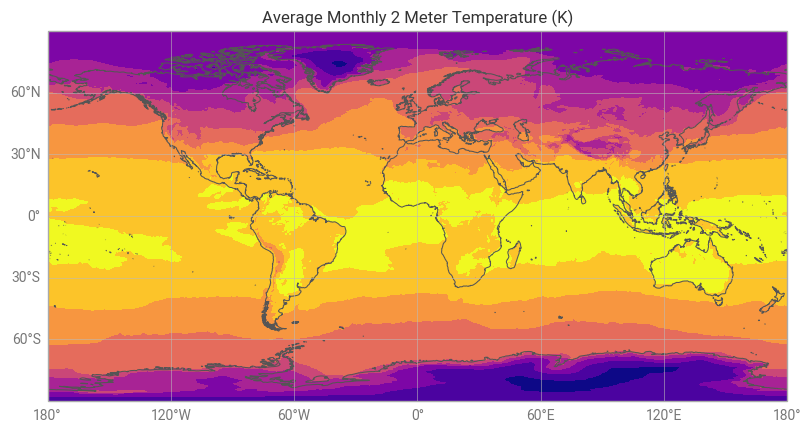

In [10]:
chart = earthkit.plots.Map(extent=[-180, 180, -90, 90])
chart.contourf(
    data[0],
    auto_style=True,
    units="kelvin"
)

chart.title("Average Monthly 2 Meter Temperature (K)")
chart.coastlines()
chart.gridlines()
chart.show()

In [11]:
# Regrid t=from healpix for conversion to xarray
data_latlon = earthkit.regrid.interpolate(data, out_grid={"grid": [1,1]}, method="linear")
# Convert data to xarray
data_latlon.to_xarray()

<xarray.Dataset> Size: 526kB
Dimensions:    (latitude: 181, longitude: 360)
Coordinates:
  * latitude   (latitude) float64 1kB 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude  (longitude) float64 3kB 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
Data variables:
    avg_2t     (latitude, longitude) float64 521kB ...
Attributes:
    param:        avg_2t
    paramId:      228004
    class:        d1
    stream:       clmn
    levtype:      sfc
    type:         fc
    expver:       0001
    date:         20200215
    Conventions:  CF-1.8
    institution:  ECMWF